In [2]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [3]:
f_path = 'C:/project/NLP'
data_set = utils.get_file(fname=f_path + 'imdb.tar.gz', origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', extract=True, cache_subdir='datasets',
                          cache_dir=f_path)

In [4]:
def directory_data(directory):  # 데이터를 다 긁어모아라
    data = {}   # 데이터를 다 넣을 딕셔너리를 만들고
    data['review'] = [] #리뷰라는 리스트도 만들고
    for file_path in os.listdir(directory):      # 디렉토리에 있는걸 리스트로 만들어서 하나씩
        with open(os.path.join(directory, file_path), 'r', encoding='utf-8') as file:
            data['review'].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [5]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [6]:
train_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'train'))
test_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'test'))

In [7]:
print(train_df.head())

                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1


In [8]:
print(train_df.tail())

                                                  review  sentiment
12495  Towards the end of the movie, I felt it was to...          0
12496  This is the kind of movie that my enemies cont...          0
12497  I saw 'Descent' last night at the Stockholm Fi...          0
12498  Some films that you pick up for a pound turn o...          0
12499  This is one of the dumbest films, I've ever se...          0


In [9]:
reviews = list(train_df['review'])

In [10]:
print(reviews[:3])

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from

In [11]:
tokenized_reviews = [r.split() for r in reviews]

In [12]:
print(tokenized_reviews[0])

['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy.', 'It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"Teachers".', 'My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'Bromwell', "High's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"Teachers".', 'The', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students.', 'When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'I', 'immediately', 'recalled', '.........', 'at', '..........', 'High.', 'A', 'classic', 'line:', 'INSPECTOR:', "I'm", 'here', 'to', 'sack', 'one', 'of', 'your', 't

In [13]:
review_len_by_token = [len(t) for t in tokenized_reviews]

In [14]:
print(review_len_by_token[0])

140


In [15]:
print(len(review_len_by_token))

25000


In [16]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

In [17]:
print(len(review_len_by_eumjeol))

25000


In [18]:
print(review_len_by_eumjeol[0])

667


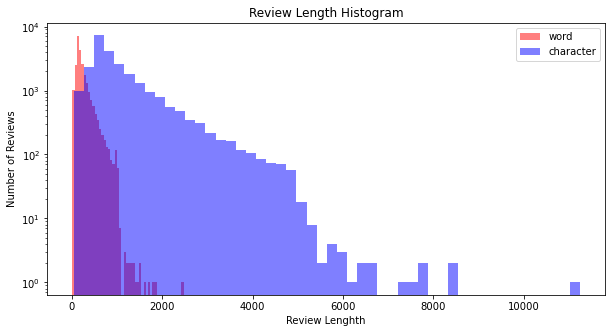

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.legend(['word', 'character'])
plt.xlabel('Review Lenghth')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))


문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


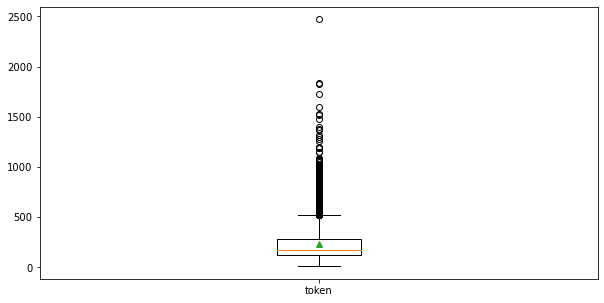

In [21]:
plt.figure(figsize=(10,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)
plt.show()

In [22]:
# 녹색 삼각형이 평균, 노란색 직선이 중간값(median), 박스의 윗부분이 3/4분기 값, 밑부분이 1/4분기 값

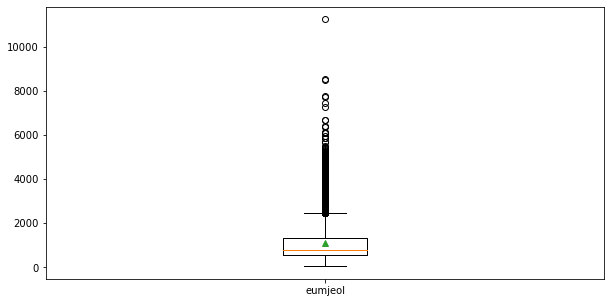

In [23]:
plt.figure(figsize=(10,5))
plt.boxplot([review_len_by_eumjeol], labels=['eumjeol'], showmeans=True)
plt.show()

In [24]:
# 둘다 이상치가 많음을 확인할 수 있음

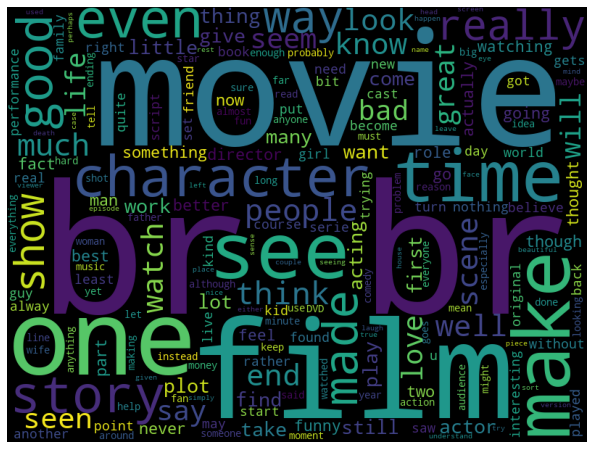

In [25]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(train_df['review']))
plt.figure(figsize=(13,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [26]:
import seaborn as sns

In [27]:
sentiment = train_df['sentiment'].value_counts()
print(sentiment)

1    12500
0    12500
Name: sentiment, dtype: int64


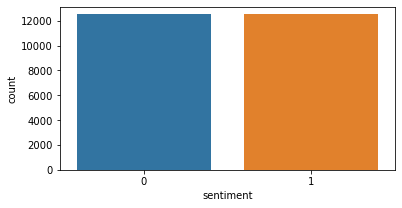

In [28]:
fig, axe =plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_df['sentiment'])
plt.show()